In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## 2.4 Calculus

For a long time, how to calculate the area of a circle remained a mystery. Then, the ancient Greek mathematician Archimedes came up with the clever idea to inscribe a series of polygons with increasing numbers of vertices on the inside of a circle (Fig. 2.4.1). For a polygon with \( n \) vertices, we obtain \( n \) triangles. The height of each triangle approaches the radius \( r \) as we partition the circle more finely. At the same time, its base approaches \( \frac{2\pi r}{n} \), since the ratio between arc and secant approaches 1 for a large number of vertices. Thus, the area of the polygon approaches:

$$ n \cdot r \cdot \frac{1}{2} \left(\frac{2\pi r}{n}\right) = \pi r^2. $$

This limiting procedure leads to both differential calculus and integral calculus. The former can tell us how to increase or decrease a function value by manipulating its arguments. This comes in handy for the optimization problems that we face in deep learning, where we repeatedly update our parameters in order to decrease the loss function. Optimization addresses how to fit our models to training data, and calculus is its key prerequisite. However, do not forget that our ultimate goal is to perform well on previously unseen data. That problem is called generalization and will be a key focus of other chapters.

```python
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
```

### 2.4.1 Derivatives and Differentiation

Put simply, a derivative is the rate of change in a function with respect to changes in its arguments. Derivatives can tell us how rapidly a loss function would increase or decrease were we to increase or decrease each parameter by an infinitesimally small amount. Formally, for functions \( f : \mathbb{R} \to \mathbb{R} \), that map from scalars to scalars, the derivative of \( f \) at a point \( x \) is defined as:

$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}. $$

This term on the right-hand side is called a limit and it tells us what happens to the value of an expression as a specified variable approaches a particular value. This limit tells us what the ratio between a perturbation \( h \) and the change in the function value \( f(x+h) - f(x) \) converges to as we shrink its size to zero.

When \( f'(x) \) exists, \( f \) is said to be differentiable at \( x \); and when \( f'(x) \) exists for all \( x \) on a set, e.g., the interval \([a, b]\), we say that \( f \) is differentiable on this set. Not all functions are differentiable, including many that we wish to optimize, such as accuracy and the area under the receiving operating characteristic (AUC). However, because computing the derivative of the loss is a crucial step in nearly all algorithms for training deep neural networks, we often optimize a differentiable surrogate instead.

We can interpret the derivative \( f'(x) \) as the instantaneous rate of change of \( f(x) \) with respect to \( x \). Let’s develop some intuition with an example. Define:

```python
def f(x):
    return 3 * x ** 2 - 4 * x
```

Setting \( x = 1 \), \( h \) approaches 2 as \( h \) approaches 0. While this experiment lacks the rigor of a mathematical proof, we will soon see that indeed \( f'(1) = 2 \).

```python
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')
```

```
h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003
```

There are several equivalent notational conventions for derivatives. Given \( y = f(x) \), the following expressions are equivalent:

$$ f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = Df(x) = D_x f(x), $$

where the symbols \( \frac{d}{dx} \) and \( D \) are differentiation operators. Below, we present the derivatives of some common functions:

$$ \frac{d}{dx} C = 0 \quad \text{for any constant } C $$
$$ \frac{d}{dx} x^n = nx^{n-1} \quad \text{for } n \neq 0 $$
$$ \frac{d}{dx} e^x = e^x $$
$$ \frac{d}{dx} \ln x = x^{-1} $$

Functions composed from differentiable functions are often themselves differentiable. The following rules come in handy for working with compositions of any differentiable functions \( f \) and \( g \), and constant \( C \).

#### Differentiation Rules

1. **Constant multiple rule:**
   $$ \frac{d}{dx} [C f(x)] = C \frac{d}{dx} f(x) $$

2. **Sum rule:**
   $$ \frac{d}{dx} [ f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) $$

3. **Product rule:**
   $$ \frac{d}{dx} [ f(x) g(x) ] = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) $$

4. **Quotient rule:**
   $$ \frac{d}{dx} \left( \frac{f(x)}{g(x)} \right) = \frac{ f'(x) g(x) - f(x) g'(x) }{ g^2(x) } $$

Using this, we can apply the rules to find the derivative of \( 3x^2 - 4x \):

$$ \frac{d}{dx} [3x^2 - 4x] = 3 \frac{d}{dx} x^2 - 4 \frac{d}{dx} x = 6x - 4. $$

Plugging in \( x = 1 \) shows that, indeed, the derivative is 2 at this location. Note that derivatives tell us the slope of a function at a particular location.




## 2 Visualization Utilities

We can visualize the slopes of functions using the `matplotlib` library. We need to define a few functions. As its name indicates, `use_svg_display` tells `matplotlib` to output graphics in SVG format for crisper images. The comment `#@save` is a special modifier that allows us to save any function, class, or other code block to the `d2l` package so that we can invoke it later without repeating the code, e.g., via `d2l.use_svg_display()`.

```python
#@save
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')
```

Conveniently, we can set figure sizes with `set_figsize`. Since the import statement `from matplotlib import pyplot as plt` was marked via `#@save` in the `d2l` package, we can call `d2l.plt`.

```python
#@save
def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
```

The `set_axes` function can associate axes with properties, including labels, ranges, and scales.

```python
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
```

With these three functions, we can define a `plot` function to overlay multiple curves. Much of the code here is just ensuring that the sizes and shapes of inputs match.

```python
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[],
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    def has_one_axis(X):
        # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    
    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
```

Now we can plot the function \( u = f(x) \) and its tangent line \( y = 2x - 3 \) at \( x = 1 \), where the coefficient 2 is the slope of the tangent line.

```python
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])
```
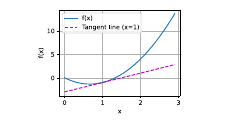


## 3 Partial Derivatives and Gradients

Thus far, we have been differentiating functions of just one variable. In deep learning, we also need to work with functions of many variables. We briefly introduce notions of the derivative that apply to such multivariate functions.

Let $ y = f (x_1, x_2, \dots, x_n) $ be a function with $ n $ variables. The partial derivative of 4 y $ with respect to its $ i $-th parameter $ x_i $ is:

$$
\frac{\partial y}{\partial x_i} = \lim_{h \to 0} \frac{f (x_1, \dots, x_{i-1}, x_i + h, x_{i+1}, \dots, x_n) - f (x_1, \dots, x_i, \dots, x_n)}{h}.
$$

To calculate $ \frac{\partial y}{\partial x_i} $, we treat $ x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n $ as constants and compute the derivative of $ y $ with respect to $ x_i $. The following notation conventions for partial derivatives are all common and mean the same thing:

$$
\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_i f = f_{x_i} = D_i f = D_{x_i} f.
$$

We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain a vector called the **gradient** of the function. Suppose that the input of function $ f: \mathbb{R}^n \to \mathbb{R} $ is an $ n $-dimensional vector:

$$
x = [x_1, x_2, \dots, x_n]^\top.
$$

The gradient of $ f $ with respect to $ x $ is a vector of $ n $ partial derivatives:

$$
\nabla_x f (x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}.
$$

When there is no ambiguity, $ \nabla_x f (x) $ is typically written as $ \nabla f (x) $.

Some useful rules for differentiating multivariate functions:

- For all $ A \in \mathbb{R}^{m \times n} $:
  $$ \nabla_x (Ax) = A^\top $$
  $$ \nabla_x (x^\top A) = A $$
- For square matrices $ A \in \mathbb{R}^{n \times n} $:
  $$ \nabla_x (x^\top A x) = (A + A^\top) x $$
  $$ \nabla_x \|x\|^2 = \nabla_x (x^\top x) = 2x $$
  $$ \nabla_X \|X\|_F^2 = 2X $$

##  Chain Rule

In deep learning, gradients are often difficult to compute because we work with nested functions. The **chain rule** simplifies this.

For functions of a single variable, suppose that:

$$
y = f (g(x)), \quad u = g(x).
$$

If both $ y = f (u) $ and $ u = g(x) $ are differentiable, then the chain rule states:

$$
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}.
$$

For multivariate functions, suppose $ y = f (u) $ depends on $ u_1, u_2, \dots, u_m $, where each $ u_i = g_i(x) $ depends on $ x_1, x_2, \dots, x_n $, i.e., $ u = g(x) $. Then the chain rule states:

$$
\frac{\partial y}{\partial x_i} = \sum_{j=1}^{m} \frac{\partial y}{\partial u_j} \cdot \frac{\partial u_j}{\partial x_i}.
$$

Or, in vector notation:

$$
\nabla_x y = A \nabla_u y,
$$

where $ A \in \mathbb{R}^{n \times m} $ contains the derivative of vector $ u $ with respect to vector $ x $. Thus, evaluating the gradient requires computing a vector-matrix product, which is why linear algebra is fundamental in deep learning.

## 5 Discussion

While we have just scratched the surface of a deep topic, a number of concepts come into focus:

1. **Automatic differentiation**: The composition rules for differentiation can be applied mechanically, enabling automatic gradient computation.
2. **Gradient computation**: Computing the derivatives of vector-valued functions requires matrix multiplications, forming the foundation of deep learning optimization.
3. **Backpropagation**: Gradients allow us to determine how to adjust model parameters to minimize loss. We traverse computation graphs in a forward direction to evaluate functions and in a backward direction to compute gradients. Later chapters will introduce **backpropagation**, a key algorithm for training deep neural networks.

From an optimization perspective, **gradients guide parameter updates** to improve model performance on unseen data. Each step of training in deep learning relies on gradient calculations to adjust weights efficiently.



## 5 Automatic Differentiation

Recall from Section 2.4 that calculating derivatives is the crucial step in all of the optimization algorithms that we will use to train deep networks. While the calculations are straightforward, working them out by hand can be tedious and error-prone, and this problem only grows as our models become more complex. Fortunately, all modern deep learning frameworks take this work off of our plates by offering **automatic differentiation** (often shortened to **autograd**).

As we pass data through each successive function, the framework builds a **computational graph** that tracks how each value depends on others. To calculate derivatives, automatic differentiation works backwards through this graph applying the **chain rule**. The computational algorithm for applying the chain rule in this fashion is called **backpropagation**.

While autograd libraries have become a hot concern over the past decade, they have a long history. In fact, the earliest references to autograd date back over half of a century (Wengert, 1964). The core ideas behind modern backpropagation date to a PhD thesis from 1980 (Speelpenning, 1980) and were further developed in the late 1980s (Griewank, 1989). While backpropagation has become the default method for computing gradients, it is not the only option. For instance, the Julia programming language employs **forward propagation** (Revels et al., 2016).

Before exploring methods, let's first master the `autograd` package.

```python
import torch
```

### 1 A Simple Function

Let's assume that we are interested in differentiating the function:

$$ y = 2 \mathbf{x}^{\top} \mathbf{x} $$

with respect to the column vector $\mathbf{x}$. To start, we assign $\mathbf{x}$ an initial value.

```python
x = torch.arange(4.0)
x
```

```
tensor([0., 1., 2., 3.])
```

Before we calculate the gradient of $y$ with respect to $x$, we need a place to store it. In general, we avoid allocating new memory every time we take a derivative because deep learning requires successively computing derivatives with respect to the same parameters thousands or millions of times, and we might risk running out of memory. Note that the gradient of a scalar-valued function with respect to a vector $x$ is vector-valued and has the same shape as $x$.

```python
# Can also create
x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default
```

We now calculate our function of $x$ and assign the result to $y$.

```python
y = 2 * torch.dot(x, x)
y
```

```
tensor(28., grad_fn=<MulBackward0>)
```

We can now take the gradient of $y$ with respect to $x$ by calling its `backward` method. Next, we can access the gradient via $x$'s `grad` attribute.

```python
y.backward()
x.grad
```

```
tensor([ 0., 4., 8., 12.])
```

We already know that the gradient of the function

$$ \nabla_{x} y = 4x $$

We can now verify that the automatic gradient computation and the expected result are identical.

```python
x.grad == 4 * x
```

```
tensor([True, True, True, True])
```

Now let's calculate another function of $x$ and take its gradient. Note that PyTorch does not automatically reset the gradient buffer when we record a new gradient. Instead, the new gradient is added to the already-stored gradient. This behavior comes in handy when we want to optimize the sum of multiple objective functions.

To reset the gradient buffer, we can call `x.grad.zero_()` as follows:

```python
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad
```

```
tensor([1., 1., 1., 1.])
```

